# Real-world Data Wrangling

### **1.1.** Problem Statement
The primary goal of my analysis is to identify the three counties in Washington State with the highest number of electric vehicles. Once these counties are identified, my aim is to determine the top five car manufacturers present in these areas. The focus will then shift to understanding which of these manufacturers is the most prevalent in each of the three counties. This will allow me to gain a better understanding of the electric vehicle market distribution in these key regions. 

To achive my goal i used these two datasets provided by WS dataset:

First dataset : Electric_Vehicle_Population_Size_History_By_County.csv," contain historical data of all type of vehicle. i focused on 2023 year.  We have information of the number of BEV vehicle, PLUG-IN vehicle and not electric car for each counties 

The second dataset:
Electric_Vehicle_Population_Data provided using an API and download the json file provides detailed information about electric vehicles made by different car makers such as Tesla , Bmw ecc.

#### **Dataset 1**

The database show for each counties how the total vehicle in 2023 are diveded between different motorisation

Type: CSV_FILE

Method: Download data manually using a Csv file

Dataset variables:

*   *Variable 1 Counties
*   *Variable 2 Electric Vehicle (EV) Total population in 2023
*   *Variable 3 total vehicle in 2023

In [2]:
import pandas as pd

In [3]:
#import my raw data in csv file
bev_car = pd.read_csv('Electric_Vehicle_Population_Size_History_By_County.csv')

In [4]:
bev_car.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,October 31 2019,Flathead,MT,Passenger,1,0,1,70,71,1.41
1,October 31 2019,New London,CT,Passenger,0,2,2,244,246,0.81
2,June 30 2019,Pend Oreille,WA,Truck,0,0,0,5730,5730,0.00
3,November 30 2019,Virginia Beach,VA,Passenger,1,0,1,706,707,0.14
4,February 28 2018,Sacramento,CA,Passenger,1,0,1,307,308,0.32


#### Dataset 2

This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).

Type: Json File

Method: The data was gathered using the "API" method from Data.wa.government

Dataset variables:

*   *Variable 1 County
*   *Variable 2 Car Maker

In [12]:
#import file using an api directly to WS state dataplatform

import pandas as pd
import requests

url_dati = "https://data.wa.gov/api/views/f6w7-q2d2/rows.json?accessType=DOWNLOAD"
response_data = requests.get(url_dati)
dati = response_data.json()['data']

url_colonne = "https://data.wa.gov/api/views/f6w7-q2d2/columns.json"
response_data = requests.get(url_colonne)
dati_json = response_data.json()
colonne = [col['name'] for col in dati_json]

lista_finale = []

for i in dati:
    lista_finale.append(i[8:])

db = pd.DataFrame(lista_finale, columns= colonne)

bev_county = db[db['State'] == 'WA']

bev_county.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Counties,Congressional Districts,WAOFM - GIS - Legislative District Boundary
162998,7SAYGAEE6P,Whatcom,Bellingham,WA,98225,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,40,236252152,POINT (-122.486115 48.761615),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,53073001203,2744,2,44
162999,7SAYGDEE4P,King,Vashon,WA,98070,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,34,224470599,POINT (-122.46049 47.44873),CITY OF TACOMA - (WA),53033027702,3009,7,37
163000,7SAYGDEE0P,Snohomish,Bothell,WA,98021,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1,244676939,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,53061051937,3213,1,1
163001,JTDKARFP7H,Pierce,Spanaway,WA,98387,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,2,276466165,POINT (-122.435115 47.1045),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,53053073128,3210,10,35
163002,3FMTK3SU7N,Spokane,Spokane,WA,99203,2022,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,6,197399828,POINT (-117.425265 47.635365),MODERN ELECTRIC WATER COMPANY,53063004702,3214,5,9


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [ ]:
#show visually the first rows of the db
bev_car.head()

In [ ]:
#Get the general info of the columns
print(bev_car.info())
#get the elementar statistic for each columns
print(bev_car.describe())
#understand how many null value are there
print(bev_car.isnull().sum())
#understand if there are some duplicates values
print(bev_car.duplicated().sum())

Data Quality Issue: Date columns is not in data time format, so we need to convert it

### Quality Issue 2:

In [ ]:
#show visually the first rows of the db
bev_county.head()

In [ ]:
#Get the general info of the columns
print(bev_county.info())
#get the elementar statistic for each columns
print(bev_county.describe())
#understand how many null value are there
print(bev_county.isnull().sum())
#understand if there are some duplicates values
print(bev_county.duplicated().sum())

Data Quality Issue: Missing Values
Issue Description: The 'Counties' columns have 641 missing values . This is a data quality issue because incomplete data can affect the accuracy of analyses and conclusions.
Assessment Justification: The identification of missing values was performed using programmatic methods such as df.isnull().sum(), which provides a direct count of missing values in each column. This method ensures an accurate and comprehensive identification of null values across the dataset.

### Tidiness Issue 1:

In [17]:
#First tidy issue -- Multiple Variables Stored in One Column:
bev_county['Vehicle Location'].value_counts().head(10)

POINT (-122.12302 47.67668)        4171
POINT (-122.1873 47.820245)        3024
POINT (-122.20264 47.6785)         2779
POINT (-122.201905 47.61385)       2605
POINT (-122.16937 47.571015)       2603
POINT (-122.3185 47.67949)         2513
POINT (-122.0313266 47.6285782)    2290
POINT (-122.29179 47.43473)        2261
POINT (-122.151665 47.75855)       2238
POINT (-122.2377542 47.582905)     2199
Name: Vehicle Location, dtype: int64

In [22]:
# Checking if there are columns that could be split into multiple columns
potential_columns_to_split = [col for col in bev_county.columns if ' ' in col]

potential_columns_to_split

['VIN (1-10)',
 'Postal Code',
 'Model Year',
 'Electric Vehicle Type',
 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
 'Electric Range',
 'Base MSRP',
 'Legislative District',
 'DOL Vehicle ID',
 'Vehicle Location',
 'Electric Utility',
 '2020 Census Tract',
 'Congressional Districts',
 'WAOFM - GIS - Legislative District Boundary']

Issue and justification: 

Issue : The "Vehicle Location" column combines the latitude and longitude coordinates into a single field, making it more difficult to perform tasks such as sorting, filtering, or applying functions that require these to be separate variables. In other word we have two values inside the same variable Vehicle location 

Justification: Separating the latitude and longitude into two distinct columns simplifies many types of analyses and operations, such as calculating distances, mapping,

### Tidiness Issue 2: 

In [9]:
#Second tidy issue -- Each Observation Forms a Row
bev_county[['County','Make']].head(10)

,County,Make
0,Thurston,TESLA
1,King,NISSAN
2,King,TESLA
3,Kitsap,HONDA
4,Thurston,AUDI
5,Thurston,FORD
6,King,AUDI
7,Thurston,NISSAN
8,Kitsap,TESLA
9,Snohomish,TESLA


In [16]:
# Checking the number of unique values in Make Columns
bev_county['Make'].nunique()

39

Issue and justification: 

Issue: the problem is that we are facing the tidy issue where one variable (Make columns) contains differen values. The issue is that we have a differnt row for each car maker observation , in other word the variable "Make" contains different types of values/information 

Justification: With 39 different car makers, analyzing trends or patterns specific to each maker becomes more complex and will be very challenging to understand which are the most widespreaded manufactures.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [ ]:
#create a copy of the  raw db
bev_car_final = bev_car.copy()
bev_county_final = bev_county.copy()

### **Quality Issue 1: FILL IN**

In [ ]:
# FILL IN - Apply the cleaning strategy
# Assuming the 'Date' column in the merged_ev_data_washington DataFrame needs to be split
# First, ensure the 'Date' column is in datetime format
bev_car_final['Date'] = pd.to_datetime(bev_car_final['Date'])
# Splitting the 'Date' column into year
bev_car_final['Year'] = bev_car_final['Date'].dt.year

In [ ]:
#see if the columns has been modified
bev_car_final.info()

Justification: Date columns is not in data time format and i need the year for my analysis. In this way i will be able to get only the year and filter the dataset

### **Quality Issue 2: FILL IN**

In [ ]:
#drop all the null rows
bev_car_final.dropna(inplace=True)

In [ ]:
#check if the script was succesfull
bev_car_final.isnull().sum()

Justification: we decided to drop all the rows without values because they can cause a miscalculation for the next analysis

### **Tidiness Issue 1: FILL IN**

In [ ]:
#using regex to extract the data from the columns Vehichle location
bev_county_final['longitudine'], bev_county_final['latidudine'] = zip(*bev_county_final['Vehicle Location'].str.extract(r'POINT \(([^ ]+) ([^ ]+)\)').values)                                                    

In [ ]:
#check if the columns longitudine e latiduine have been created
bev_county_final[['Vehicle Location','longitudine','latidudine']].head(10)

Justification: The result of zip(*df['location'].str.extract(r'POINT \(([^ ]+) ([^ ]+)\)').values) is a series of tuples, where each tuple contains the longitude and latitude of a row from the original DataFrame. These tuples are then assigned to the new columns 'longitude' and 'latitude' in the DataFrame.

### **Tidiness Issue 2: FILL IN**

In [ ]:
#groupby county e make to get for each car maker how many vehicle are in each county
final = bev_county_final.groupby(['County','Make'])['Model'].count().reset_index()

#filter the dataset by the top four car makert
ev_auto = final[final['Make'].isin(['TESLA', 'NISSAN', 'CHEVROLET', 'FORD', 'BMW'])]

#create a pivot table to fix the second tidiness issue. For my analysis i need to have the car maker in columns
ev_db = pd.pivot_table(ev_auto, index='County', columns='Make', aggfunc='sum', fill_value=0).reset_index(drop = False)

# Falttering multiindex
ev_db.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in ev_db.columns.values]

# Rename columns
ev_db.columns = ['County','BMW','CHEVROLET','FORD','NISSAN','TESLA']

In [ ]:
#verify the few rows of the db_subset
ev_db.head()

Justification: i dediced to use  a pivot table to fix my second tidenss issue ( based on the aim of my analysis). After i got the pivot table i had to use the process of converting a MultiIndex (or hierarchical index) in a pandas DataFrame to a flat list of column. The process  is called "flattening the MultiIndex." This process involves transforming the multi-level column names into a simpler, single-level format.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [ ]:
#filter dataset

occ_data_final = bev_car_final[(bev_car_final['State'] == 'WA') & (bev_car_final['Year'] == 2023)]

#final datase 1 that contain for each county the total electric vehicle registered in Washington state
dataset_1 = occ_data_final.groupby('County')[['Electric Vehicle (EV) Total','Total Vehicles']].sum().reset_index()

#create new columns, % of bev vehicle on total vehicle
dataset_1['%_BEV_Vehicle'] = round(dataset_1['Electric Vehicle (EV) Total']/dataset_1['Total Vehicles'],2)

#final dataset 2 that contain for each WS county the number of electric vehicle for the top 4 car maker in Wa
dataset_2 = ev_db

#merge dataset_1 , dataset_2 on County using left merged

final_database = pd.merge(dataset_1,dataset_2, on= 'County', how = 'left')

#final db

final_database

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [36]:
#save my final database in a csv file and store it in my working space
final_database.to_csv('BEV_Vehicles_cleaned_data.csv')

In [37]:
#check if everything is ok
cleaned_db = pd.read_csv('BEV_Vehicles_cleaned_data.csv')
cleaned_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   39 non-null     int64  
 1   County                       39 non-null     object 
 2   Electric Vehicle (EV) Total  39 non-null     int64  
 3   Total Vehicles               39 non-null     int64  
 4   %_BEV_Vehicle                39 non-null     float64
 5   BMW                          39 non-null     int64  
 6   CHEVROLET                    39 non-null     int64  
 7   FORD                         39 non-null     int64  
 8   NISSAN                       39 non-null     int64  
 9   TESLA                        39 non-null     int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 3.2+ KB


## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question: Which are the main counties with the highest % of BEV vehicle ? 

In [38]:
#understand and sorting the cleaned db to understand which counties have the highest number of BEV vehicle
cleaned_db.sort_values(by = 'Electric Vehicle (EV) Total', ascending= False).head()

,Unnamed: 0,County,Electric Vehicle (EV) Total,Total Vehicles,%_BEV_Vehicle,BMW,CHEVROLET,FORD,NISSAN,TESLA
16,16,King,805035,17209351,0.05,4140,5294,3137,6657,41735
30,30,Snohomish,176787,7277858,0.02,694,1202,1025,1599,9916
26,26,Pierce,117034,7418234,0.02,541,1053,899,1010,5267
5,5,Clark,91623,4411331,0.02,384,817,561,808,3925
17,17,Kitsap,50949,2550158,0.02,227,551,329,628,1778


<AxesSubplot: xlabel='County'>

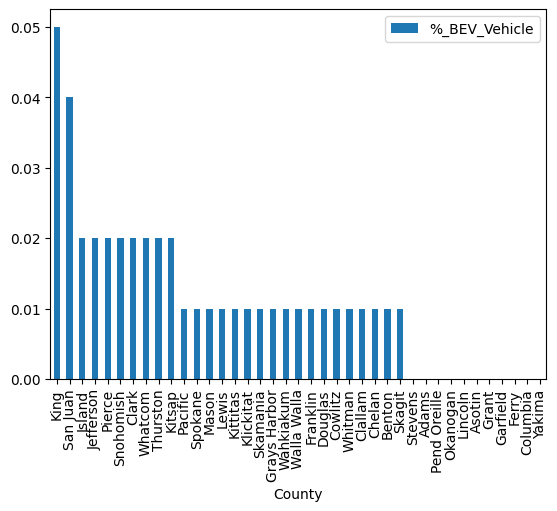

In [39]:
#create a bar plot
cleaned_db[['County','%_BEV_Vehicle']].sort_values(by= '%_BEV_Vehicle',ascending = False).plot(kind = 'bar', x = 'County')

The county with the highest % of BEV (Battery Electric Vehicles) is King County, followed by San Juan and Island This makes sense because Seattle, the largest city in Washington State, is located in King County.

*Research question: Which car makers are the most widespread in the top three countries in terms of BEV (Battery Electric Vehicle) adoption?"

In [40]:
#create columns needed for my second analysis

cleanend_db_anlysis = cleaned_db[cleaned_db['County'].isin(['King','San Juan','Island'])]
cleanend_db_anlysis['TESLA_%'] = round(cleanend_db_anlysis['TESLA']/cleanend_db_anlysis['Electric Vehicle (EV) Total'],2)
cleanend_db_anlysis['BMW_%'] = round(cleanend_db_anlysis['BMW']/cleanend_db_anlysis['Electric Vehicle (EV) Total'],2)
cleanend_db_anlysis['CHEVROLET_%'] = round(cleanend_db_anlysis['CHEVROLET']/cleanend_db_anlysis['Electric Vehicle (EV) Total'],2)
cleanend_db_anlysis['FORD_%'] = round(cleanend_db_anlysis['FORD']/cleanend_db_anlysis['Electric Vehicle (EV) Total'],2)
cleanend_db_anlysis['NISSAN_%'] = round(cleanend_db_anlysis['NISSAN']/cleanend_db_anlysis['Electric Vehicle (EV) Total'],2)

/tmp/ipykernel_15/3357227735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanend_db_anlysis['TESLA_%'] = round(cleanend_db_anlysis['TESLA']/cleanend_db_anlysis['Electric Vehicle (EV) Total'],2)
/tmp/ipykernel_15/3357227735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanend_db_anlysis['BMW_%'] = round(cleanend_db_anlysis['BMW']/cleanend_db_anlysis['Electric Vehicle (EV) Total'],2)
/tmp/ipykernel_15/3357227735.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

<AxesSubplot: xlabel='County'>

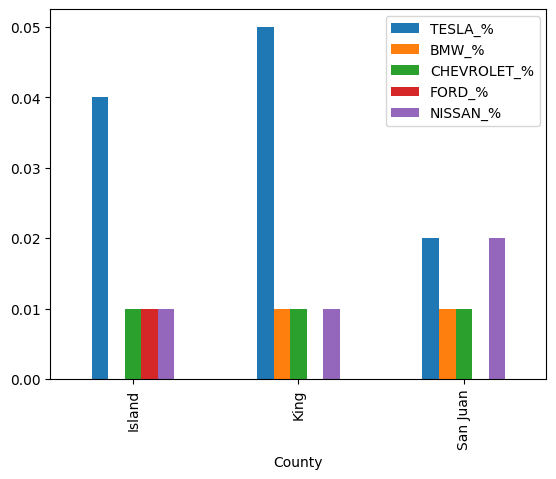

In [41]:
#create a bar plot
cleanend_final_final = cleanend_db_anlysis[['County','TESLA_%','BMW_%','CHEVROLET_%','FORD_%','NISSAN_%']]
cleanend_final_final.plot(kind = 'bar', x = 'County')

*Answer to research question: Tesla accounts for the highest percentage of total BEV (Battery Electric Vehicles) in King and Island counties. However, in San Juan County, Tesla and Nissan have an equal percentage of BEV vehicles."

### **5.2:** Reflection
If I had more time, it would be interesting to identify which counties have the highest number of conventional (non-electric) vehicles. By doing this, we could understand which counties are not keeping pace with the transition to electric vehicles. Additionally, we could analyze the best-selling models for the top five carmakers, providing further insights into consumer preferences and market trends in these regions.